In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [85]:
df = pd.read_csv('survey_results_public.csv')
df.head(10)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
5,6,I am a developer by profession,No,NaN,14,NaN,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,React.js,NaN,NaN,NaN,6,4
6,7,I am a developer by profession,Yes,NaN,18,Monthly,NaN,NaN,India,United States dollar,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,A lot more welcome now than last year,NaN,6,4
7,8,I am a developer by profession,Yes,36.0,12,Yearly,116000.0,116000.0,United States,United States dollar,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Django;React.js;Vue.js,Flask,Just as welcome now as I felt last year,39.0,17,13
8,9,I am a developer by profession,No,30.0,20,NaN,NaN,NaN,Tunisia,United States dollar,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",Angular.js,jQuery,Just as welcome now as I felt last year,50.0,6,4
9,10,I am a developer by profession,Yes,22.0,14,Yearly,25000.0,32315.0,United Kingdom,Pound sterling,...,Easy,Appropriate in length,No,Mathematics or statistics,Flask;jQuery,Flask;jQuery,Somewhat more welcome now than last year,36.0,8,4


In [86]:
df.shape

(64461, 61)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

In [88]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [89]:
df = df[['Country', 'EdLevel', 'YearsCodePro', 'Employment', 'ConvertedComp']]
df = df.rename({'ConvertedComp': 'Salary'}, axis=1)

df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,"Independent contractor, freelancer, or self-em...",NaN
1,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,Employed full-time,NaN
2,Russian Federation,NaN,NaN,NaN,NaN
3,Albania,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,NaN,NaN
4,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,Employed full-time,NaN


In [90]:
df = df[df['Salary'].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,Employed full-time,116000.0
9,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,32315.0
10,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,40070.0
11,Spain,Some college/university study without earning ...,7,Employed full-time,14268.0
12,Netherlands,"Secondary school (e.g. American high school, G...",20,Employed full-time,38916.0


In [91]:
df.shape

(34756, 5)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34756 entries, 7 to 64154
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       34756 non-null  object 
 1   EdLevel       34188 non-null  object 
 2   YearsCodePro  34621 non-null  object 
 3   Employment    34717 non-null  object 
 4   Salary        34756 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.6+ MB


<AxesSubplot:>

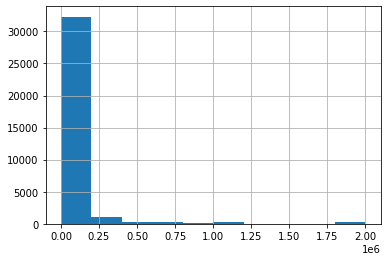

In [93]:
df.Salary.hist()

In [94]:
df = df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [95]:
# keep data where the user Employment is Full-Time
df = df[df['Employment'] == 'Employed full-time']
df.Employment.head()

7     Employed full-time
9     Employed full-time
10    Employed full-time
11    Employed full-time
12    Employed full-time
Name: Employment, dtype: object

In [96]:
# drop Employment column as it is not needed in prediction now
df = df.drop('Employment', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30019 entries, 7 to 64154
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       30019 non-null  object 
 1   EdLevel       30019 non-null  object 
 2   YearsCodePro  30019 non-null  object 
 3   Salary        30019 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.1+ MB


In [97]:
df.shape

(30019, 4)

In [98]:
df.Country.value_counts()

United States     7569
India             2425
United Kingdom    2287
Germany           1903
Canada            1178
                  ... 
Benin                1
Fiji                 1
San Marino           1
Guinea               1
Andorra              1
Name: Country, Length: 154, dtype: int64

In [99]:
df[df['Country'] == 'Egypt'].Country.value_counts()

Egypt    74
Name: Country, dtype: int64

In [100]:
print(df.Country.value_counts().values[0])
print(df.Country.value_counts().index[0])

7569
United States


In [101]:
# we need to clean the Country column as it is skewed
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map  # dectionary of different categories 


In [102]:
country_map = shorten_categories(df.Country.value_counts(), 400)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

Other                 8549
United States         7569
India                 2425
United Kingdom        2287
Germany               1903
Canada                1178
Brazil                 991
France                 972
Spain                  670
Australia              659
Netherlands            654
Poland                 566
Italy                  560
Russian Federation     522
Sweden                 514
Name: Country, dtype: int64

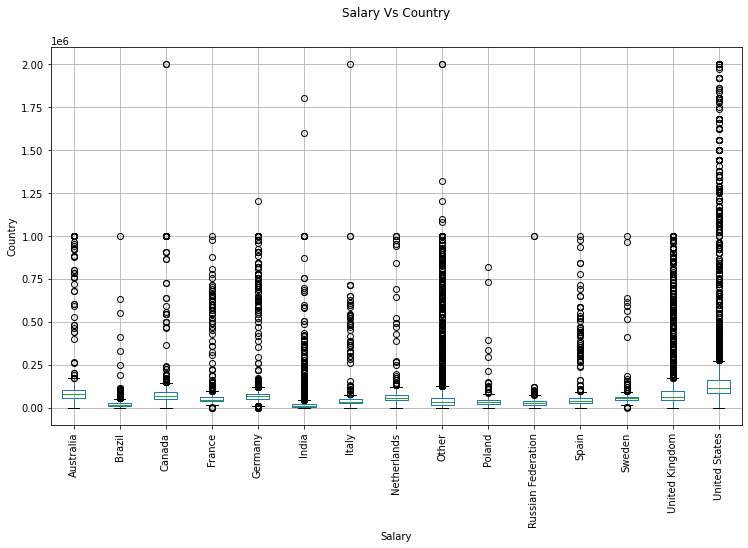

In [103]:
def box_plot(df,x,y):
    fig, ax = plt.subplots(1,1, figsize=(12,7))
    df.boxplot(x, y, ax=ax)
    suptitle = x + ' Vs ' + y
    plt.suptitle(suptitle)
    plt.title('')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.xticks(rotation=90)
    plt.show()

box_plot(df, 'Salary', 'Country')

In [104]:
df = df[df['Salary'] <= 250000]
df = df[df['Salary'] >= 10000]
df = df[df['Country'] != 'Other']

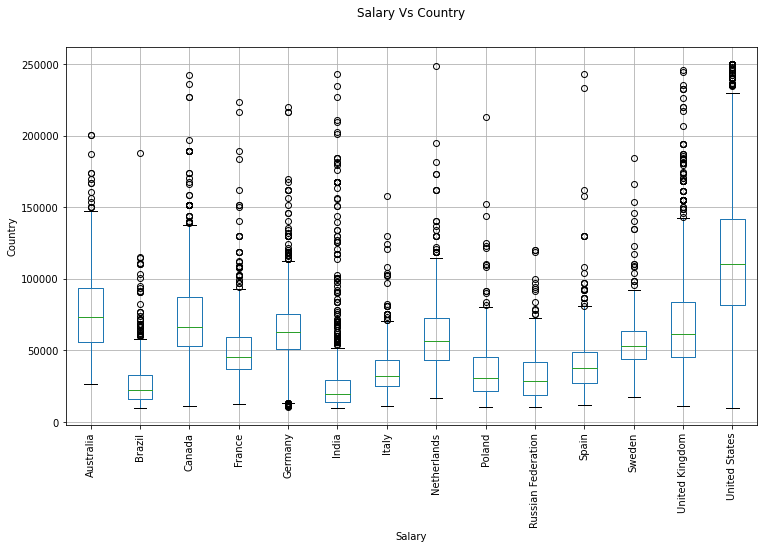

In [105]:
box_plot(df, 'Salary', 'Country')

In [106]:
df['YearsCodePro'].unique()

array(['13', '4', '2', '7', '20', '1', '3', '10', '12', '29', '6', '28',
       '8', '23', '15', '25', '9', '11', 'Less than 1 year', '5', '21',
       '16', '18', '14', '32', '19', '22', '38', '30', '26', '27', '17',
       '24', '34', '35', '33', '36', '40', '39', 'More than 50 years',
       '31', '37', '41', '45', '42', '44', '43', '50', '49'], dtype=object)

In [107]:
def clean_experience(x):
    if x == 'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)

In [108]:
df['YearsCodePro'].unique()

array([13. ,  4. ,  2. ,  7. , 20. ,  1. ,  3. , 10. , 12. , 29. ,  6. ,
       28. ,  8. , 23. , 15. , 25. ,  9. , 11. ,  0.5,  5. , 21. , 16. ,
       18. , 14. , 32. , 19. , 22. , 38. , 30. , 26. , 27. , 17. , 24. ,
       34. , 35. , 33. , 36. , 40. , 39. , 50. , 31. , 37. , 41. , 45. ,
       42. , 44. , 43. , 49. ])

In [109]:
df['EdLevel'].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'I never completed any formal education',
       'Primary/elementary school'], dtype=object)

In [110]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [111]:
df["EdLevel"].unique()

array(['Bachelor’s degree', 'Master’s degree', 'Less than a Bachelors',
       'Post grad'], dtype=object)

In [112]:
df["EdLevel"].value_counts()

Bachelor’s degree        9144
Master’s degree          4821
Less than a Bachelors    3557
Post grad                 969
Name: EdLevel, dtype: int64

In [113]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df["EdLevel"].unique()

array([0, 2, 1, 3])

In [114]:
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df["Country"].unique()

array([13, 12, 10,  7,  4,  2,  6,  1,  3,  5, 11,  8,  0,  9])

In [115]:
X = df.drop('Salary', axis=1)
y = df["Salary"]


In [116]:
y.values

array([116000.,  32315.,  40070., ...,  70000., 140000., 150000.])

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8,
                                                    random_state=42, shuffle=True)

In [118]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train.values)

LinearRegression()

In [119]:
y_pred = linear_reg.predict(X_test)

In [120]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y_test, y_pred))
error

38696.5806020915

In [121]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X_train, y_train.values)

DecisionTreeRegressor(random_state=0)

In [122]:
y_pred = dec_tree_reg.predict(X_test)

In [123]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y_test, y_pred))
print("${:,.02f}".format(error))

$31,903.37


In [124]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X_train, y_train.values)

RandomForestRegressor(random_state=0)

In [125]:
y_pred = random_forest_reg.predict(X_test)

In [126]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y_test, y_pred))
print("${:,.02f}".format(error))

$31,413.78


In [127]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [128]:
regressor = gs.best_estimator_

regressor.fit(X_train, y_train.values)
y_pred = regressor.predict(X_test)
error = np.sqrt(mean_squared_error(y_test, y_pred))
print("${:,.02f}".format(error))

$31,011.44


In [129]:
X

,Country,EdLevel,YearsCodePro
7,13,0,13.0
9,12,2,4.0
10,12,0,2.0
11,10,1,7.0
12,7,1,20.0
...,...,...,...
64113,13,1,15.0
64116,13,0,6.0
64122,13,1,4.0
64127,13,3,12.0


In [131]:
# country, edlevel, yearscode
x = np.array([["United States", 'Master’s degree', 15 ]])
x

array([['United States', 'Master’s degree', '15']], dtype='<U15')

In [133]:
x[:, 0] = le_country.transform(x[:,0])
x[:, 1] = le_education.transform(x[:,1])
x = x.astype(float)
x

array([[13.,  2., 15.]])

In [134]:
y_pred = regressor.predict(x)
y_pred

c:\windows\system32\venv\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([140482.01526718])

In [137]:
import pickle

data = {"model": regressor, "le_country": le_country, "le_education": le_education}
with open ('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [138]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]

In [139]:
y_pred = regressor_loaded.predict(x)
y_pred

c:\windows\system32\venv\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([140482.01526718])